# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

### **Question 1**: 

Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 

From the point of view of a Motivate employee:

1. Compare the usage at various stations throughout the city. Investigate the usage at every station, by comparing weekdays versus weekends, at different times of the day, and in correlation with weather factors, such as precipitation and temperature.

2. Compare how the regular (subscription) users and the casual (day pass) users access the bike-share services. Are there any stations that are predominantly preferred by one type of users?

3. Determine if the number of subscription, or casual users vary significantly with the season.

3. Are there any correlations between the bike demands at various stations? Are there any routes that are more popular than others?

From the point of view of a bike-share user.

1. Find information about the usage, detailed on day and time, at a specific station or stations on a certain route.

2. For a specific station find estimative data for the number of bikes that would be available on certain days, at various times.  


> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

### **Question 2**: 

However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime as dt# operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = list(trip_reader)[0]
    
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.

### **Question 3a**: 

Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city == 'NYC' or city == 'Chicago':
        duration = int(datum['tripduration'])/60 
    if city == 'Washington':
        duration = int(datum['Duration (ms)'])/60000
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.

### These tests do not conform with the numerical values from the first trips
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    if city == 'NYC':
        ### Reads the date as a string from the dictionary.
        date = datum['starttime'] 
        ### Takes the date as a string, and returns a Python datetime object. 
        dobject = dt.strptime(date, '%m/%d/%Y %H:%M:%S') 
    
    if city == 'Chicago':
        ### Reads the date as a string from the dictionary.
        date = datum['starttime'] 
        ### Takes the date as a string, and returns a Python datetime object. 
        dobject = dt.strptime(date, '%m/%d/%Y %H:%M') 
        
    if city == 'Washington':
        ### Reads the date as a string from the dictionary.
        date = datum['Start date']
        ### Takes the date as a string, and returns a Python datetime object. 
        dobject = dt.strptime(date, '%m/%d/%Y %H:%M') 
        
    ### Extracts the month from the datetime object, returns it as an integer.
    month = int(dobject.strftime('%m'))
    ### Extracts the hour from the datetime object, returns it as an integer.
    hour = int(dobject.strftime('%H'))
    ### Extracts the weekday from the datetime object, returns its full name.
    day_of_week = dobject.strftime('%A')
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'NYC' or city == 'Chicago':
        user_type = datum['usertype']
    if city == 'Washington':
        user_type = datum['Member Type']
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Registered'} ### it was Subscriber, which I think it is incorrect.

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

### **Question 3b**: 

Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
         
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'] = time_of_trip(row, city)[0]
            new_point['hour'] = time_of_trip(row, city)[1]
            new_point['day_of_week'] = time_of_trip(row, city)[2]
            new_point['user_type'] = type_of_user(row, city)
        

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            trip_writer.writerow(new_point)
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Registered')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_file = './examples/BayArea-Y3-Summary.csv'
print(number_of_trips(data_file))

(5666, 633, 6299)


In [10]:
### Collect together the information about each city in a list.
### Include the city name, the term used for subscription customers and the cleaned data file.

city_files = [['Washington', 'Registered', './data/Washington-2016-Summary.csv'],
             ['Chicago', 'Subscriber', './data/Chicago-2016-Summary.csv'],
             ['New York', 'Subscriber', './data/NYC-2016-Summary.csv']]

In [11]:
### Change the function 'number_of_trips' to allow to work with any of the cities in the list
### and to compute the proportions of trips made by subscribers and short-term customers.

def number_of_trips_updated(filename, user):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
        
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == user:
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # compute the proportion of trips made by subscribers, rounded to 3 decimals
        subscribers_proportion = round(n_subscribers / n_total, 3)
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total, subscribers_proportion)

In [12]:
### Print the infomation for each city.

print('The number of trips made by subscribers, customers, the total overall and \n'
      'the proportion of trips made by the subscribers are:')
print("" )

for entry in city_files:
    print('For {}: {}'.format(entry[0], number_of_trips_updated(entry[2], entry[1])))

The number of trips made by subscribers, customers, the total overall and 
the proportion of trips made by the subscribers are:

For Washington: (51753, 14573, 66326, 0.78)
For Chicago: (54982, 17149, 72131, 0.762)
For New York: (245896, 30902, 276798, 0.888)


### **Question 4a**: 

Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 

    1. The city with the highest number of trips is New York City.
    2. The highest proportion of trips made by Subscribers is found in New York City. 
    3. The highest proportion of trips made by short-term Customers is found in Chicago.

> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.


In [13]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##



In [14]:
def average_duration(filename, city):
    """
    This function reads in a file with trip data and the corresponding city, 
    and reports average duration 
    and the percentage of trips that are longer than 30 minutes.
    """
        
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        tot_duration = 0
        longer_trips = 0
        
        # get the sum of all trip durations and the number of trips loger than 30 minutes
        # round to 3 decimals
        for row in reader:
            tot_duration = tot_duration + round(float(row['duration']),3)
            if float(row['duration']) > 30:
                longer_trips = longer_trips + 1
        
        # get the total number of rides, using a previously defined function
        for entry in city_files:
            if city ==entry[0]: 
                n_total = number_of_trips_updated(filename, entry[1])[2]
        
        
        # return the average duration and the proportion of trips loger than 30 minutes 
        return(round(tot_duration/n_total, 3), round(longer_trips/n_total, 3))
    

### **Question 4b**: 

Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 

In [15]:
### print the output from the function 'average_duration' for each city
print('The average trip length for each city, followed by \n'
      'the proportion of rides made in each city that are longer than 30 minutes:')
print("")

for entry in city_files:
    print('For {}: {}'.format(entry[0], average_duration(entry[2], entry[0])))

The average trip length for each city, followed by 
the proportion of rides made in each city that are longer than 30 minutes:

For Washington: (18.933, 0.108)
For Chicago: (16.564, 0.083)
For New York: (15.813, 0.073)


### **Question 4c**: 

Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

In [16]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##



In [17]:
def average_duration_split(city, user, filename):
    """
    This function reads an entry in city_files and reports 
    the average length for trips made by subscribers and
    the average trip length for trips made by short term customers.
    """
        
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        duration_subscriber = 0
        duration_customer = 0
        
        # find totals for trips durations, by user type
        for row in reader:
            if row['user_type'] == user:
                duration_subscriber = duration_subscriber + round(float(row['duration']),3)
            else:
                duration_customer = duration_customer + round(float(row['duration']),3)
        
        # get total number of rides for each type of rider
        for entry in city_files:
            if city == entry[0]: 
                n_subscribers = number_of_trips_updated(entry[2], entry[1])[0]
                n_customers = number_of_trips_updated(entry[2], entry[1])[1]
        
        # return the averages as a tuple
        return(round(duration_subscriber/n_subscribers,3), round(duration_customer/n_customers,3))
    

In [18]:
### print the information obtained from average_duration_split function for each city
print('The average trip length for each city, split by type of users,\n'
      'for Subscribers and for short-term Customers:')
print("")

for entry in city_files:
    print('For {}: {}'.format(entry[0], average_duration_split(entry[0], entry[1], entry[2])))

The average trip length for each city, split by type of users,
for Subscribers and for short-term Customers:

For Washington: (12.528, 41.678)
For Chicago: (12.067, 30.98)
For New York: (13.681, 32.776)


**Answer to Question 4c**: 

The Customers take in average trips that are much longer (two to three times) than the trips taken by Subscribers. In particular, for New York City the ratio trip length for Customers vs. trip length for Subscribers is about $2.4$.

<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

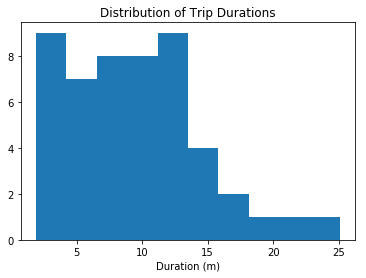

In [19]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

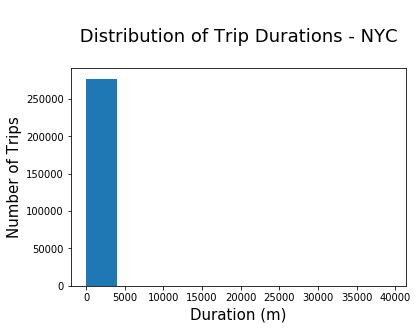

In [20]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

### use the data for New York City

with open(city_files[2][2], 'r') as f_in:
    # set up csv reader object
    reader = list(csv.DictReader(f_in))
        
### create an empty list for the data to be saved in
data_TN = []

### save all the trip durations, as float numbers in a list
for i in range(0, len(reader)):
    data_TN.append(float(reader[i]['duration']))
            
### a naive histogram of the trip durations, all riders in NYC 

plt.hist(data_TN)

### title and axes labelling
plt.title('\n Distribution of Trip Durations - NYC \n', fontsize=18)
plt.xlabel('Duration (m)', fontsize = 15)
plt.ylabel('Number of Trips', fontsize = 15)

plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

### **Question 5**: 

Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answers to Question 5**: 


* Both distributions are positively skewed. 


* The skewness coefficients are computed below for the two sets of data, the one for Subscribers is much larger. Note: these coefficients are calculated for the entire data, while the histograms show the data for trips with duration of less than $75$ minutes. The difference between these two values indicates, for example, that for Subscribers the interval of the trip durations is much larger than for Customers. 


* Boxplot representations for the trip durations are given below. The maximum value for the trip durations for Subscribers is $39396$ (which can be also observed as a single outlier on the right, on the boxplot) while the maximum for Customers is $12099$, hence the large difference between the two skewness coefficients mentioned above. On boxplots the outliers are better depicted.


* For Subscribers the peak of the distribution is in the interval between $5$ and $10$ minutes. Most of the Subscribers take shorter trips of $25$ minutes or less.


* For the Customers the largest number of trips are $20$ to $25$ minutes long, most of the trips are between $10$ and $30$ minutes long. Customers tend to take longer trips than the Subscribers.

In [21]:
## Use this and additional cells to answer Question 5. ##

def durations_list(entry):
    """
    This function reads an entry in city_files and creates three lists,
    one with the trip durations for all bike-share riders, one for the subscribers,
    the last one for the short-term customers.
    """
    with open(entry[2], 'r') as f_in:
        # set up csv reader object
        reader = list(csv.DictReader(f_in))
        
        # create empty lists for the data to be saved in
        dataT = [] ### for all riders
        dataS = [] ### for Subscribers
        dataC = [] ### for Customers
        
        # save the data in lists whose entries are float numbers
        for i in range(0, len(reader)):
            # all the riders
            dataT.append(float(reader[i]['duration']))
            # subscribers and customers    
            if reader[i]['user_type'] == entry[1]:
                dataS.append(float(reader[i]['duration']))
            else:
                dataC.append(float(reader[i]['duration']))
        # return a tuple of three lists
        return(dataT, dataS, dataC)            


In [22]:
### The data in list format for New York City

data_TN = durations_list(city_files[2])[0] ### all riders in NYC area
data_SN = durations_list(city_files[2])[1] ### Subscribers in NYC area
data_CN = durations_list(city_files[2])[2] ### Customers in NYC area

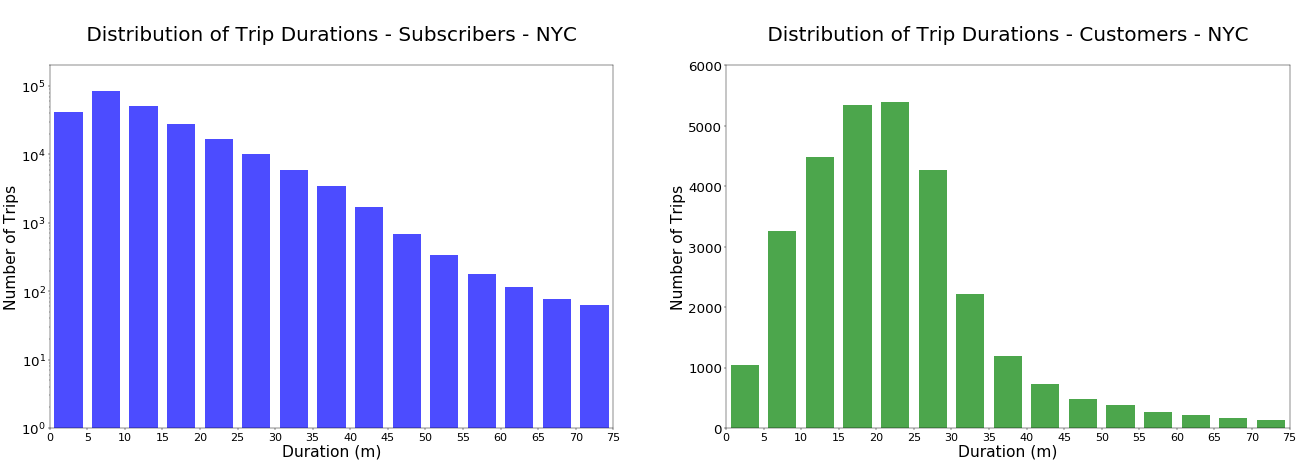

In [23]:
"""
Adjust the parameters in .hist() and use styling options to improve 
the representation of the histogram, with the data split between 
Subscribers and Customers (i.e. short-term users).

"""

### set the bins at 5 minutes intervals
bin5=[0, 5,10,15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

### adjust the size and the appearance of the output
plt.figure(figsize=(40, 12), dpi=40, linewidth=2, frameon=True)


### use subplots in the same figure, the two histograms will print out side by side
### the first subplot
plt.subplot(1,2,1)

### the histogram for Subscribers
### use a logarithmic scale, the output shows more details than the linear one
plt.hist(data_SN, facecolor='b', alpha=0.70, bins=bin5, rwidth=0.75, log = True)

### title and labels 
plt.title('\n Distribution of Trip Durations - Subscribers - NYC \n', fontsize = 36)
plt.xlabel('Duration (m)', fontsize = 28)
plt.ylabel('Number of Trips', fontsize = 28)

### set limits for the x-axis from 0 to 75 min, with bins set at 5 min intervals
### y-axis limits are chosen based on the highest bar in the histogram
plt.axis([1, 75, 1, 200000])
plt.xticks(bin5, fontsize = 20)
plt.yticks(fontsize = 24)

### the second subplot
plt.subplot(1,2,2)

### the histogram for Customers
### use a linear scale 
plt.hist(data_CN, facecolor='g', alpha=0.70, bins=bin5, rwidth=0.75, log = False)

### title and labels 
plt.title('\n Distribution of Trip Durations - Customers - NYC \n', fontsize = 36)
plt.xlabel('Duration (m)', fontsize = 28)
plt.ylabel('Number of Trips', fontsize = 28)

### set limits for the x-axis from 0 to 75 min, with bins set at 5 min intervals
### y-axis limits are chosen based on the highest bar in the histogram
plt.axis([1, 75, 1, 6000])
plt.xticks(bin5, fontsize = 20)
plt.yticks(fontsize = 24)

plt.show()


In [24]:
### import skew from the stats package
from scipy.stats import skew

### compute the skewness for the trip durations sets of data for 
### Subscribers and Customers in New York City

### Remark: this coefficient is calculated for the entire list of entries,
### not only for the trips with duration smaller than 75 minutes

print('Skewness of the Distribution for Subscribers (NYC): {}'.format(round(skew(data_SN),2)))
print('Skewness of the Distribution for Customers (NYC): {}'.format(round(skew(data_CN),2)))


Skewness of the Distribution for Subscribers (NYC): 285.48
Skewness of the Distribution for Customers (NYC): 43.23


#### Further analysis for New York City

In [25]:
### find the maximum values in each list

print('Maximum value for the trip durations for Subscribers in NYC: {}'.format(max(data_SN)))
print('Maximum value for the trip durations for Customers in NYC: {}'.format(max(data_CN)))

print("")
### determine how many trip durations are longer than 75 minutes

### for Subscribers
long_SN=[]
for entry in data_SN:
    if entry > 75:
        long_SN.append(entry)
print('Number of trips longer than 75 min for Subscribers in NYC: {}'.format(len(long_SN)))

### percentage of trips longer than 75 min for Subscribers
per_SN = round(100*len(long_SN)/len(data_SN),2)
print('This represents {}% of the trips made by Subscribers'.format(per_SN))

print("")
### for Customers
long_CN=[]
for entry in data_CN:
    if entry > 75:
        long_CN.append(entry)
print('Number of trips longer than 75 min for Customers in NYC: {}'.format(len(long_CN)))

### percentage of trips longer than 75 min for Subscribers
per_CN = round(100*len(long_CN)/len(data_CN),2)
print('This represents {}% of the trips made by Customers'.format(per_CN))

Maximum value for the trip durations for Subscribers in NYC: 39395.96666666667
Maximum value for the trip durations for Customers in NYC: 12099.15

Number of trips longer than 75 min for Subscribers in NYC: 644
This represents 0.26% of the trips made by Subscribers

Number of trips longer than 75 min for Customers in NYC: 1298
This represents 4.2% of the trips made by Customers


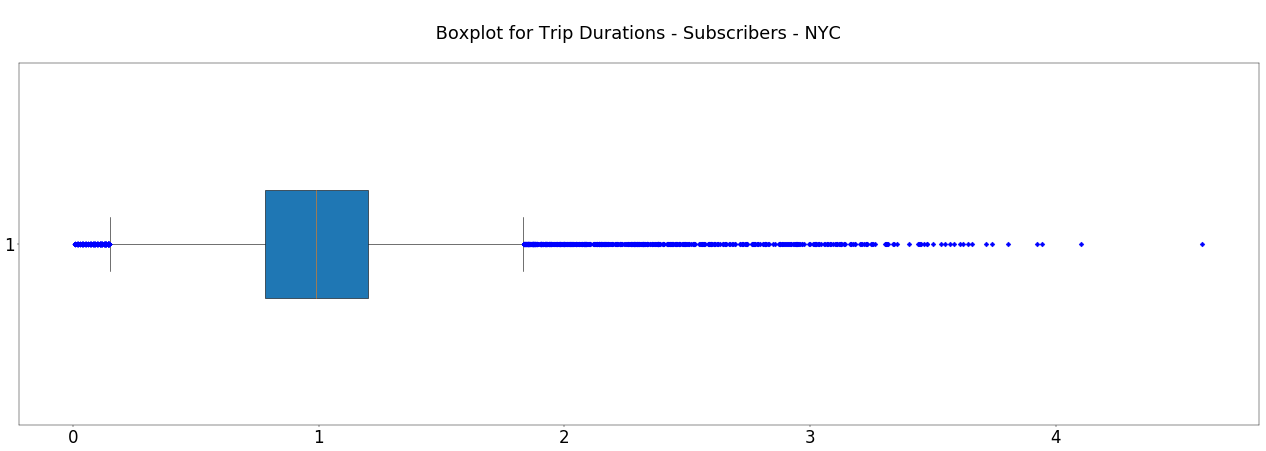

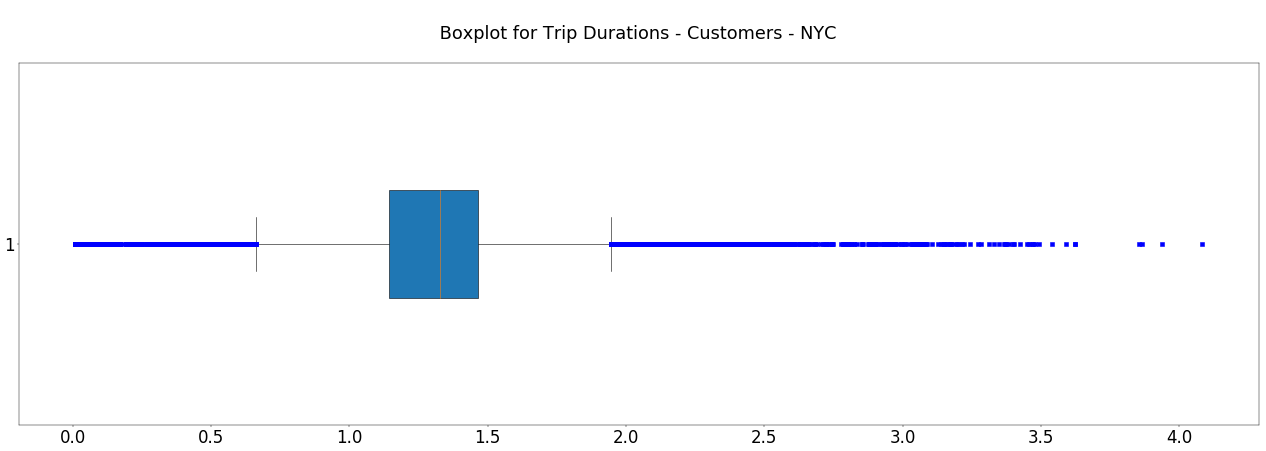

In [26]:
'''
Create boxplots to investigate the number and the spread of the the outliers
in the distribution of trip durations for both Subscribers and Customers 
in NYC. The above values suggest that a logarithmic scale would be better 
suited for this data.

'''
from math import log

### logarithmic data for Subscribers
dataSN = [log(x,10) for x in data_SN]

### logarithmic data for Customers
dataCN = [log(x,10) for x in data_CN]

plt.figure(figsize=(40, 12), dpi=40, linewidth=4, frameon=True)

### title and ticks  
plt.title('\n Boxplot for Trip Durations - Subscribers - NYC \n', fontsize = 32)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

### the boxplot
plt.boxplot(dataSN, sym='bD', vert=False, widths=.3, patch_artist=True, showfliers=True)

plt.show()

plt.figure(figsize=(40, 12), dpi=40, linewidth=4, frameon=True)

### title and ticks  
plt.title('\n Boxplot for Trip Durations - Customers - NYC \n', fontsize = 32)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

### the boxplot
plt.boxplot(dataCN, sym='bs', vert=False, widths=.3, patch_artist=True, showfliers=True)

plt.show()


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

### **Question 6**: 

Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Replace this text with your responses and include a visualization below!                                ##

### Analysis of monthly ridership in New York City

In [27]:
def station_id(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) 
    and returns the station id where the trip originated.
    
    """
        
    if city == 'NYC':
        station_id = datum['start station id']
    return station_id


In [28]:
def condense_NYC(in_file, out_file, city):
    """
    This function takes full data from the NYC input file
    and writes the condensed data to a specified output file. 
    It also includes the station_id information.
    
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'station_id','user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            
            new_point['duration'] = round(duration_in_mins(row, city),2)
            new_point['month'] = time_of_trip(row, city)[0]
            new_point['hour'] = time_of_trip(row, city)[1]
            new_point['day_of_week'] = time_of_trip(row, city)[2]
            new_point['station_id'] = station_id(row, city)
            new_point['user_type'] = type_of_user(row, city)
        

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            trip_writer.writerow(new_point)
            

In [29]:
in_file_NYC = './data/NYC-CitiBike-2016.csv'
out_file_NYC = './data/NYC-2016-MyAnalysis.csv'

condense_NYC(in_file_NYC, out_file_NYC, 'NYC')

In [30]:
def monthly_trips(month):
    """
    This function reads in a file with trip data in NYC and reports the number of
    trips made by subscribers, customers, and total overall during a given month.
    """
    with open(out_file_NYC, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        
        n_tripsSub = 0
        n_tripsCust = 0
        
        # tally up ride types for the given month
        for row in reader:
            if row['month'] == month and row['user_type'] == 'Subscriber':
                n_tripsSub += 1
            if row['month'] == month and row['user_type'] == 'Customer':
                n_tripsCust += 1
                
        # compute total number of rides
        n_trips = n_tripsSub + n_tripsCust
        
        # return tallies as a tuple
        return(n_tripsSub, n_tripsCust, n_trips)

In [31]:
months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

### the number of rides, sorted by month
### create empty lists to save the data in

by_month_Sub = [] ### for the Subscribers
by_month_Cust = [] ### for the Customers, i.e. short term users
by_month_all = [] ### all riders, by month

for entry in months:
    by_month_Sub.append(monthly_trips(entry)[0])
    by_month_Cust.append(monthly_trips(entry)[1])
    by_month_all.append(monthly_trips(entry)[2])

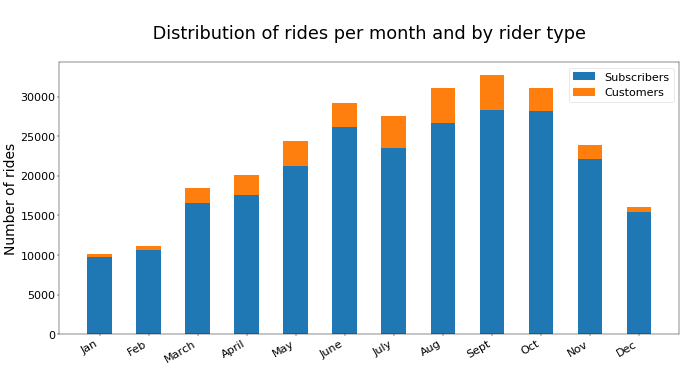

In [32]:
### display two bar charts for the distributions of trips taken by the two groups of riders,
### sorted by month, on the same figure

import numpy as np ## package to facilitate work with n-arrays
month=('Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec')

### set the number of bars 
N = 12

ind = np.arange(N)  # the x locations for the groups
width = 0.50        # the width of the bars

plt.figure(figsize=(20, 10), dpi=40, linewidth=2, frameon=True)
p1 = plt.bar(ind, by_month_Sub, width)
p2 = plt.bar(ind, by_month_Cust, width, bottom=by_month_Sub)


plt.title('\n Distribution of rides per month and by rider type \n', fontsize=32)

### beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xticks(ind, month, fontsize = 20) 

plt.ylabel('Number of rides', fontsize=25)

plt.yticks(fontsize=20)
plt.legend((p1[0], p2[0]), ('Subscribers', 'Customers'), fontsize=20)

plt.show()

In [33]:
### use pandas package to save the entries in the three lists 
### (by_month_Sub, by_month_Cust, by_month_all) as a data frame 
### and to print it as a table

import pandas as pd

monthly_data = {'Month': month, 'Subscribers': by_month_Sub, 'Customers': by_month_Cust,
        'All Riders': by_month_all}
df_month = pd.DataFrame(monthly_data, columns = ['Month', 'Subscribers', 'Customers', 'All Riders'])
df_month

,Month,Subscribers,Customers,All Riders
0,Jan,9692,488,10180
1,Feb,10601,569,11170
2,March,16535,1878,18413
3,April,17528,2632,20160
4,May,21246,3209,24455
5,June,26106,3136,29242
6,July,23545,3977,27522
7,Aug,26692,4412,31104
8,Sept,28306,4393,32699
9,Oct,28139,3006,31145


In [34]:
### print maximum and minimum values and the corresponding months they occur in

print('Maximum ridership for Subscribers:\n')
print(df_month.loc[df_month['Subscribers'].idxmax()])

print("")
print('Minimum ridership for Subscribers:\n')
print(df_month.loc[df_month['Subscribers'].idxmin()])

print("")
print('Maximum ridership for Customers:\n')
print(df_month.loc[df_month['Customers'].idxmax()])

print("")
print('Minimum ridership for Customers:\n')
print(df_month.loc[df_month['Customers'].idxmin()])

Maximum ridership for Subscribers:

Month           Sept
Subscribers    28306
Customers       4393
All Riders     32699
Name: 8, dtype: object

Minimum ridership for Subscribers:

Month            Jan
Subscribers     9692
Customers        488
All Riders     10180
Name: 0, dtype: object

Maximum ridership for Customers:

Month            Aug
Subscribers    26692
Customers       4412
All Riders     31104
Name: 7, dtype: object

Minimum ridership for Customers:

Month            Jan
Subscribers     9692
Customers        488
All Riders     10180
Name: 0, dtype: object


#### Remarks:

From the stacked bar charts combined with the numerical data we notice a direct correlation between the month and the number of rides. The lowest ridership rates, for both group of riders are in January (followed by February and December). This is not surprising, if we take into account the low temperatures and the higher probability of precipitations during these months. 

Regarding the Subscribers, there is a steady increase in the ridership from January to June, a drop in July and another steady increase to October. The Subscribers' ridership reaches its highest value in September. 

The Customers' ridership sees a sharp increase from February to March, the ridership triples during this period.

Starting in March, there is a relatively steady increase till August, when the ridership reaches its peak. The Customers' ridership in September is similar to the one in August. There is a significant drop from $1799$ rides in November to $686$ rides in December. Similar to the Subscribers the two last months of the year see higher ridership rates than the first two months of the year.

In [35]:
print('Maximum ridership for all riders:\n')
print(df_month.loc[df_month['All Riders'].idxmax()])

print("")
print('Minimum ridership for all riders:\n')
print(df_month.loc[df_month['All Riders'].idxmin()])

Maximum ridership for all riders:

Month           Sept
Subscribers    28306
Customers       4393
All Riders     32699
Name: 8, dtype: object

Minimum ridership for all riders:

Month            Jan
Subscribers     9692
Customers        488
All Riders     10180
Name: 0, dtype: object


**Remarks:**

Overall, in January we see the lowest ridership rates, while the highest rate is in September.

Regarding the ratios between the Subscribers and Customers, a line chart is provided below. We notice a significant decrease in ratios from February to March and a sharp increase from November to December. These suggest that the Subscribers use the service more regularly, in particular during the colder months. The line chart (combined with information from the monthly data) indicates that the numbers of Customers encounter larger variations with the season than the Subscribers.

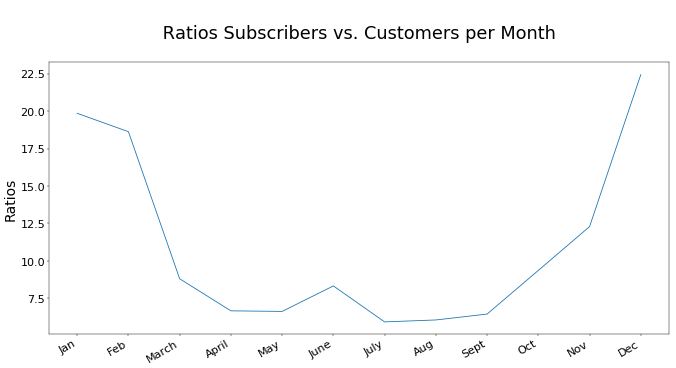

In [36]:
### organize the data as n-arrays
a=np.array(by_month_Sub, dtype=np.float)
b=np.array(by_month_Cust, dtype=np.float)
### compute the ratios of number of rides for Subscribers and Customers for each month
c= a/b

### create the figure in which the line chart will be drawn
plt.figure(figsize=(20, 10), dpi=40, linewidth=2, frameon=True)
plt.plot(c)

plt.title('\n Ratios Subscribers vs. Customers per Month \n', fontsize=32)

### beautify the x-labels 
plt.gcf().autofmt_xdate()
plt.xticks(ind, month, fontsize = 20) 

### the y-labels 
plt.ylabel('Ratios', fontsize=25)
plt.yticks(fontsize=20)

plt.show()

### Ridership by the day of the week for a specific station in New York City

In [37]:
def one_station(stationID):
    """
    This function reads in a file with trip data in NYC and retains only 
    the information for a specific station.
    """
    with open(out_file_NYC, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # create an empty list
        station = []
        
        # save the entries corresponding to the given station
        for row in reader:
            if row['station_id'] == stationID:
                station.append(row)
                
        # return a list of entries
        return station

In [38]:
def daily_trips(day, stationID):
    """
    This function reads the data from a list and reports the number of
    trips made by subscribers, customers, and the total number of rides
    for a given day of the week.
    """
    
    # initialize count variables
    m_tripsSub = 0
    m_tripsCust = 0
        
    # tally up ride types for the given day
    for entry in one_station(stationID):
        if entry['day_of_week'] == day and entry['user_type'] == 'Subscriber':
            m_tripsSub += 1
        if entry['day_of_week'] == day and entry['user_type'] == 'Customer':
            m_tripsCust += 1
                
    # compute total number of rides
    m_trips = m_tripsSub + m_tripsCust
        
    # return tallies as a tuple
    return(m_tripsSub, m_tripsCust, m_trips)

In [39]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

### create three lists, each containing the number of rides, sorted by day
### for the station 359

by_day_Sub = [] ### for the Subscribers
by_day_Cust = [] ### for the Customers, i.e. short term users
by_day_all = [] ### all riders, by day
for entry in days:
    by_day_Sub.append(daily_trips(entry,'359')[0])
    by_day_Cust.append(daily_trips(entry,'359')[1])
    by_day_all.append(daily_trips(entry,'359')[2])

In [40]:
### create a data frame with the information for the station 359
### and print it in table format

print('\n Daily Riderships for StationId = 359 in NYC \n')

daily_data = {'Day': days,'Subscribers': by_day_Sub,'Customers': by_day_Cust,
        'All Riders': by_day_all}
df_day = pd.DataFrame(daily_data, columns = ['Day', 'Subscribers', 'Customers', 'All Riders'])
df_day


 Daily Riderships for StationId = 359 in NYC 



,Day,Subscribers,Customers,All Riders
0,Monday,262,3,265
1,Tuesday,284,8,292
2,Wednesday,297,7,304
3,Thursday,310,2,312
4,Friday,231,6,237
5,Saturday,26,23,49
6,Sunday,23,14,37


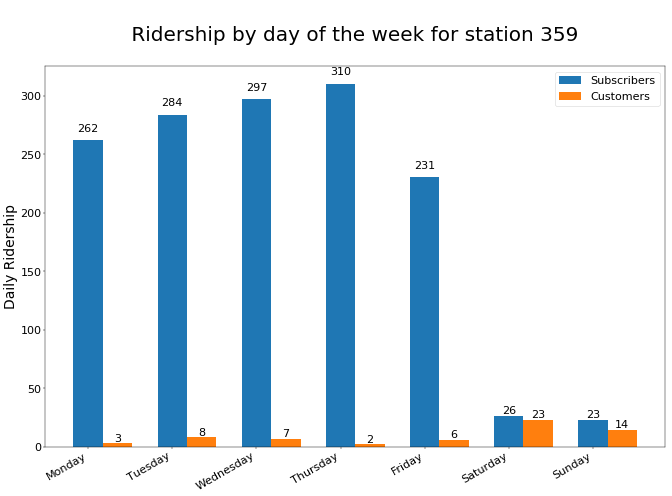

In [41]:
### create side by side bar charts for daily riderships for Subscribers and Customers
### for the station 359 in NYC

N = 7
indx = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars


plt.figure(figsize=(20, 14), dpi=40, linewidth=2, frameon=True)

ax=plt.subplot(1,1,1)
p1 = ax.bar(indx, by_day_Sub, width)
p2 = ax.bar(indx + width, by_day_Cust, width)

# add some text for labels, title and axes ticks

plt.title('\n Ridership by day of the week for station 359 \n', fontsize=36)

plt.ylabel('Daily Ridership', fontsize=25)
plt.yticks(fontsize=20)

### beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xticks(indx, days, fontsize=20)

plt.legend((p1[0], p2[0]), ('Subscribers', 'Customers'), fontsize=20)

def info_label(chart): ### adapted from a code on StackOverflow
    """
    Attach a text label above each bar displaying its height
    """
    for bar in chart:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 1.02*height,
                 '%d' % int(height),
                ha='center', va='bottom', fontsize=20),
        

info_label(p1)
info_label(p2)

plt.show()


#### Comments:

The ridership distribution per day for station 359 in New York City is analyzed. The number of Subscribers exceeds by far the number of Customers (short term users) during the weekdays.

The Subscribers prefer the weekdays, with a highest value on Thursday and a lowest ridership rate on Friday. The number of Subscribers that use the service on a Saturday or a Sunday, is about $10 \%$ of the number of such riders on a weekday. At this level the numbers of Subscribers and Customers that ride on weekends are very close (especially on a Saturday).

On the other side, there are about three to four times as many Customers riding on each day of the weekend as they are on a weekday.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

### **Question 7**: 

Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 

In my work as a research mathematician I use graphs to study complex algebraic structures. This explains my keen interest in artificial neural networks and related algorithms to analyse big data. In particular, I would like to study information flow through artificial neural networks.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.